In [2]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitfinex-crypto-coins-exchange-rate/QDL_BCHAIN_503d04810b3c433a6f9acae5067f68dc.csv


This project is meant to be a visualization into the Crypto Exchange Markets. I will use the insights I generate here to determine how I could use it in building Machine Learning models. The data I use is from the [Nasdaq Crypto exchange](https://data.nasdaq.com/databases/BITFINEX). The data is organized by the columns. Code is the unique cryptocurrency exchange pair identifier. A [crypto pair](https://www.gemini.com/cryptopedia/what-are-cryptocurrency-pairs#section-how-do-crypto-trading-pairs-work) are 2 coins that can be exchanged for one another. For example, if there is a coin X and coin Y, they can be traded for each other. This can be helpful in using arbitrage or the process of using imbalances in the market to make a profit.  The date signifies the daily value of the Crypto. The value is the price of the exchange rate of the Crypto. This data visualization excercise is meant to aid in a trading bot who uses the crypto exchange rates in finding arbritrage. Thus, we want to focus on coins with higher exchange rates. 

In [3]:
data = pd.read_csv("/kaggle/input/bitfinex-crypto-coins-exchange-rate/QDL_BCHAIN_503d04810b3c433a6f9acae5067f68dc.csv")

In [4]:
data

,code,date,value
0,TOTBC,2023-09-12,1.948368e+07
1,MKPRU,2023-09-12,2.516270e+04
2,ATRCT,2023-09-12,1.025000e+01
3,AVBLS,2023-09-12,1.613100e+00
4,BLCHS,2023-09-12,5.102556e+05
...,...,...,...
157349,TVTVR,2016-07-13,3.947330e+01
157350,TVTVR,2016-07-14,8.647390e+01
157351,TVTVR,2016-07-15,7.635480e+01
157352,TVTVR,2016-07-16,9.315410e+01


In [5]:
data["code"].value_counts()

code
TRVOU    5435
MKPRU    5435
TOTBC    5434
MKTCP    5434
TRFUS    5434
TRFEE    5434
TOUTV    5434
NTREP    5434
NTRBL    5434
NTRAT    5434
NTRAN    5434
NADDU    5434
MIREV    5434
DIFF     5434
AVBLS    5434
CPTRA    5434
BLCHS    5434
HRATE    5433
ETRVU    5428
ETRAV    5428
CPTRV    5428
MWNUS    5406
MWTRV    5399
MWNTD    5399
ATRCT    5045
BCDDC    2756
BCDDE    2756
BCDDM    2756
BCDDW    2756
BCDDY    2756
NETDF    2753
TVTVR    2753
MIOPM    2722
Name: count, dtype: int64

These are the different Crypto coin pairs. They can be equated with Ticker symbols in the stock market. An interesting observation was that these weren't very popular- only a few website mentioned these coin pairs. It is also interesting that there is such a big range in the trading volumes of some coin pairs. This might be a good thing to investigate. This can be used to find which coin pairs are newer and thus more volatile to invest in. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157354 entries, 0 to 157353
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   code    157354 non-null  object 
 1   date    157354 non-null  object 
 2   value   157354 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.6+ MB


In [7]:
data['date'] = pd.to_datetime(data['date'])

In [8]:
import matplotlib.pyplot as plt

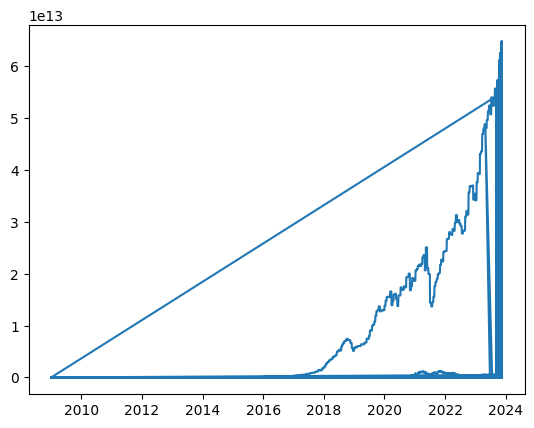

In [9]:
plt.plot(data.date,data.value)

<Axes: xlabel='date', ylabel='value'>

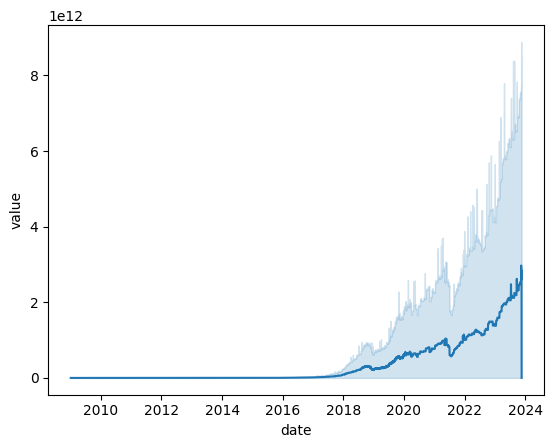

In [10]:
import seaborn as sns
sns.lineplot(x="date",y="value",data=data)

This is the aggregate value of the general trend of crypto from 2010 to 2023. It shows a general trend upward with a lot of volatility in terms of exchange rates- so it isn't quite similar to stocks that no matter whether you choose to buy, sell, or hold,you are right 50% of the time. It seems like a riskier market where more cautious ML strategy would be beneficial. Thus, taking a window-based approach where we try to predict over a 15-day window is better for prediction than considering the dataset as an aggregate. Additionally, this shows thaty it is worth it to only consider the data from a year or two prior (certainly after 2018) because that is when the data is most accurate about the crypto and represents the volatility better. 

<Axes: xlabel='date', ylabel='value'>

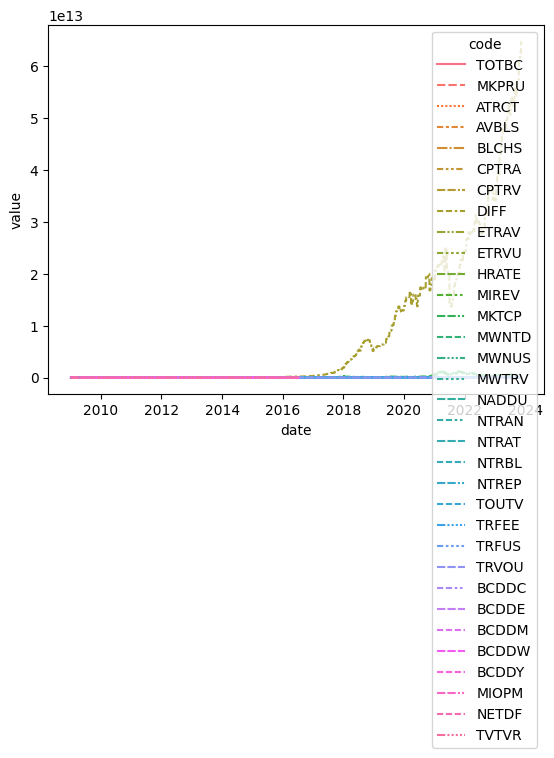

In [11]:
sns.lineplot(data=data, x="date", y="value", hue="code",style="code")


<Axes: xlabel='date', ylabel='value'>

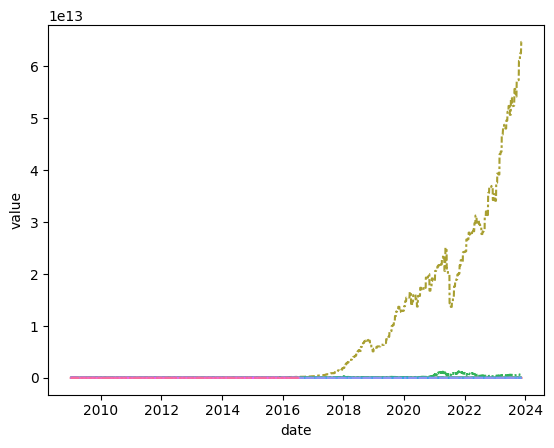

In [43]:
sns.lineplot(data=data, x="date", y="value", hue="code",style="code",legend=False)


This plot shows the breakdown of the different coin pairs over time. If I was building a trading ML algorithm, I would ignore some of the coins that never shot up in value. In fact, it seems like most of them never actually increase which means that the green coin pair- MKTCP-  is single-handedly responsible for the volatility. 

In [24]:
data.groupby('code').value.max().sort_values()

code
NETDF    0.000000e+00
AVBLS    2.524800e+00
ATRCT    4.773330e+01
MIOPM    9.900000e+01
TVTVR    2.240653e+02
CPTRA    3.003105e+02
TRFEE    1.495947e+03
NTRBL    4.373259e+03
MKPRU    6.756217e+04
MWNTD    1.449710e+05
BLCHS    5.269298e+05
NTREP    7.035170e+05
NTRAN    7.036920e+05
NADDU    1.072861e+06
ETRAV    5.313161e+06
MWTRV    8.484600e+06
TOTBC    1.954598e+07
TRFUS    2.128565e+07
CPTRV    3.650000e+07
TOUTV    6.735430e+07
MIREV    8.017224e+07
MWNUS    8.782930e+07
BCDDY    1.702367e+08
BCDDM    1.727464e+08
BCDDW    1.730718e+08
BCDDE    1.732980e+08
HRATE    5.216528e+08
NTRAT    9.212135e+08
TRVOU    5.352016e+09
BCDDC    1.177605e+10
ETRVU    1.493258e+10
MKTCP    1.277658e+12
DIFF     6.467859e+13
Name: value, dtype: float64

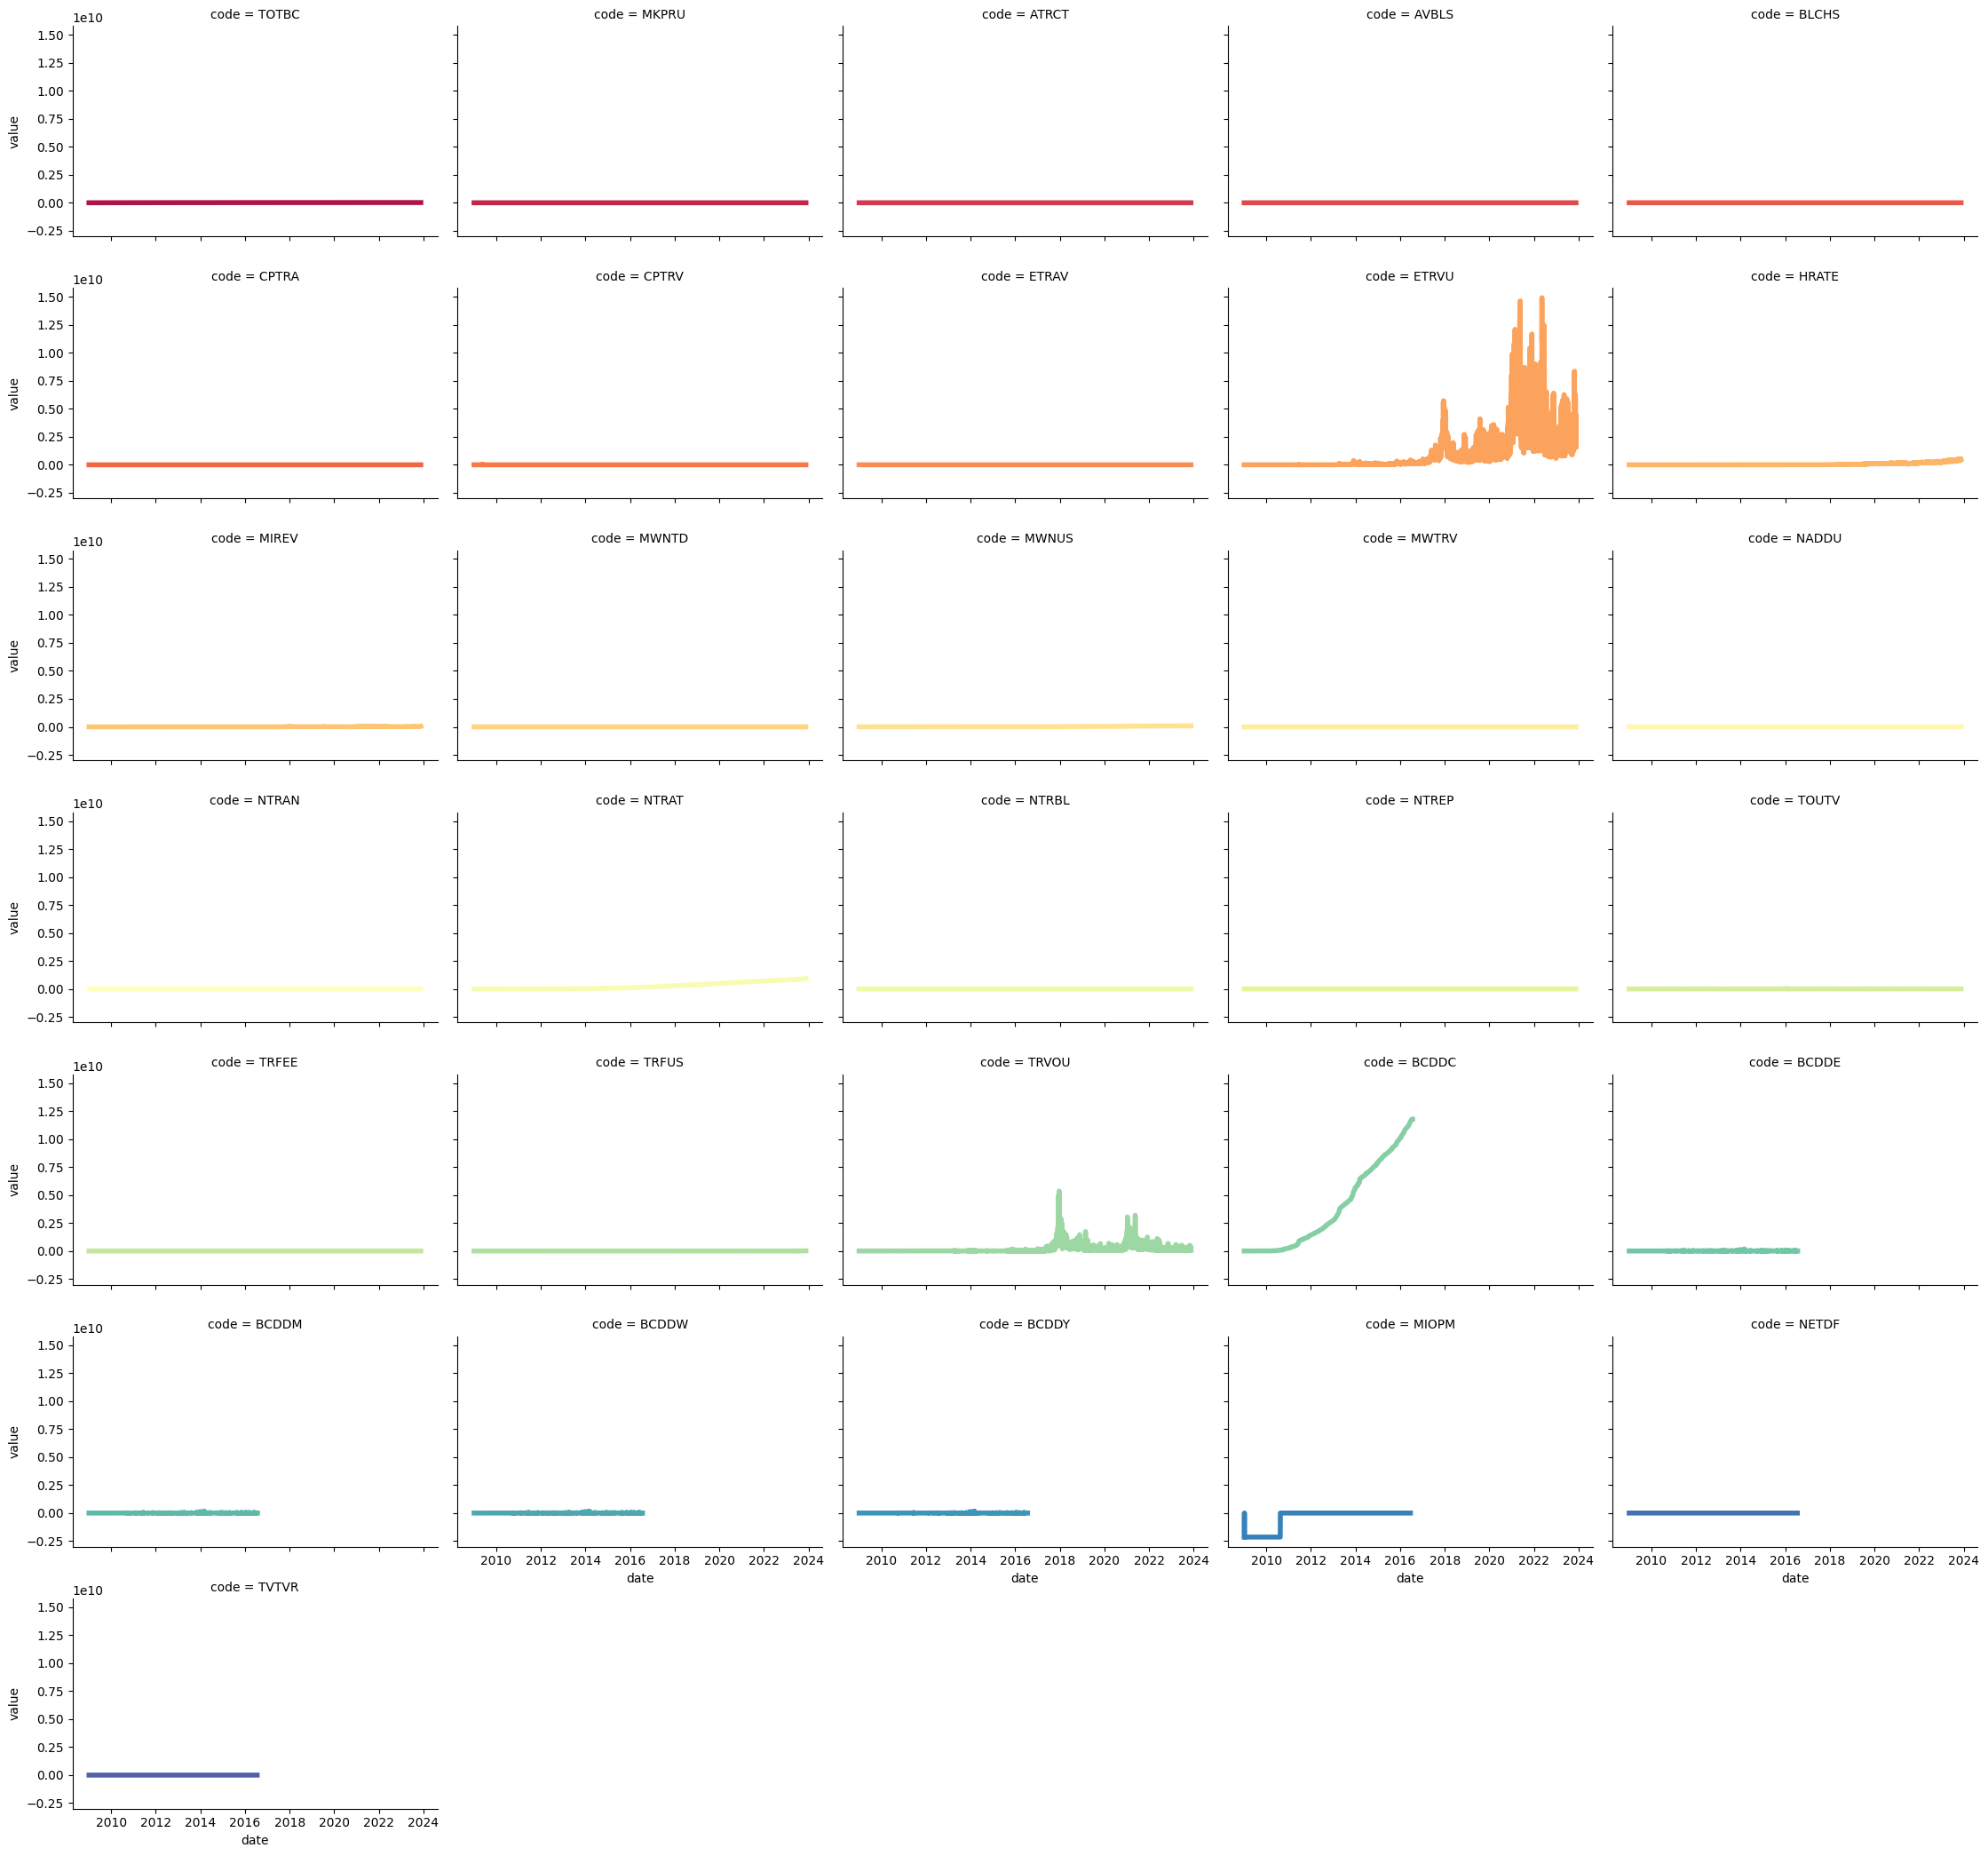

In [45]:
data=data.loc[(data["code"]!="DIFF") & (data["code"]!="MKTCP")]
sns.relplot(data = data, x = "date", y = "value",col="code",
                hue = "code",
                kind = "line", palette = "Spectral",  legend=False,linewidth = 4, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5
               )

We can ignore some of the crypto pairs whose exchange rate never reaches higher values or ones that don't experience a lot of volatility. Thus, I will focus on the base pairs ETRVU, BCDDC, TRVOU. I will ignore diff and mktcp because they are aggregate values of the crypto market. Thus, they wouldn't be advantageous in finding arbitrage. We can start by creating a new dataset with only those Crypto pairs. 

In [30]:
new_data = data.loc[(data["code"]=="ETRVU") | (data["code"]=="BCDDC") | (data["code"]=="TRVOU")]
new_data

,code,date,value
9,ETRVU,2023-09-12,2.684062e+09
24,TRVOU,2023-09-12,1.438177e+08
35,ETRVU,2023-09-13,1.902558e+09
50,TRVOU,2023-09-13,1.932882e+08
61,ETRVU,2023-09-14,2.117764e+09
...,...,...,...
154596,TRVOU,2023-09-05,5.360451e+07
154597,TRVOU,2023-09-06,5.668125e+07
154598,TRVOU,2023-09-08,1.082050e+08
154599,TRVOU,2023-09-09,1.075289e+08


<Axes: xlabel='date', ylabel='value'>

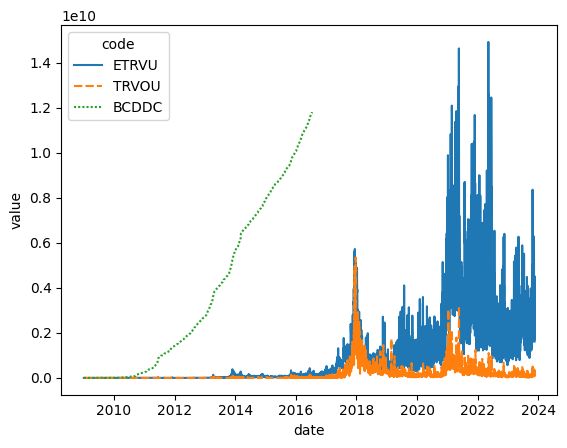

In [31]:
sns.lineplot(data=new_data, x="date", y="value", hue="code",style="code")


Since "BCDDC" crypto pairing doesn't exist anymore, I will add another crypto pair instead. 

In [36]:
new_data

,code,date,value
9,ETRVU,2023-09-12,2.684062e+09
24,TRVOU,2023-09-12,1.438177e+08
35,ETRVU,2023-09-13,1.902558e+09
50,TRVOU,2023-09-13,1.932882e+08
61,ETRVU,2023-09-14,2.117764e+09
...,...,...,...
154596,TRVOU,2023-09-05,5.360451e+07
154597,TRVOU,2023-09-06,5.668125e+07
154598,TRVOU,2023-09-08,1.082050e+08
154599,TRVOU,2023-09-09,1.075289e+08


<Axes: xlabel='date', ylabel='value'>

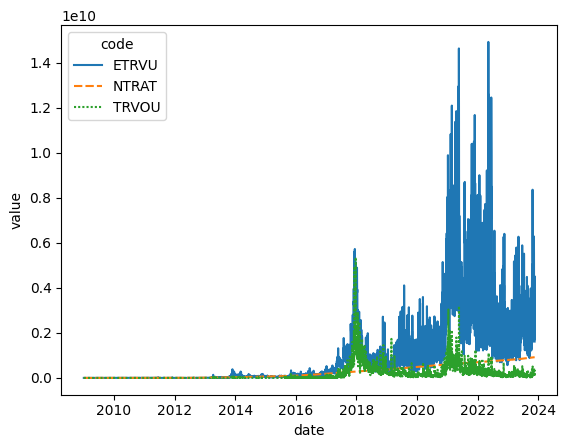

In [37]:
new_data.drop(columns=["code","date","value"]) 
new_data = data.loc[(data["code"]=="ETRVU") | (data["code"]=="NTRAT") | (data["code"]=="TRVOU")]

sns.lineplot(data=new_data, x="date", y="value", hue="code",style="code")

This looks like a good sample size to observe because it seems like the same trend exists in the Crypto makret but with different volatility. The ETRVU is the most volatile, and then the TRVOU follows its pattern but to a smaller scale with the volatility. Finally, NTRAT has the general trend of the crypto market without being affected by the details. This reminds me of Moving Average techniques in Time Series. Thus, if I was looking at arbitrage opportunities, I would use NTRAT to predict the general trend to be used in threshold decisions - when it isn't clear if it is profitable to buy, sell, or hold, I will predict TRVOU and use that general trend to inform my decisions. Similarly, if for TRVOU, I am at a threshold decision, I will predict NTRAT and use that to inform my predictions. This is how I can integrate it in ML. 

I also thought about doing some monthly analysis to see how crypto fluctuates throughout the year: 

In [47]:
new_data["day"] = new_data['date'].map(lambda x: x.day)
new_data["month"] = new_data['date'].map(lambda x: x.month)
new_data["year"] = new_data['date'].map(lambda x: x.year)

/tmp/ipykernel_47/1597147222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["day"] = new_data['date'].map(lambda x: x.day)
/tmp/ipykernel_47/1597147222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["month"] = new_data['date'].map(lambda x: x.month)
/tmp/ipykernel_47/1597147222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [48]:
new_data

,code,date,value,day,month,year
9,ETRVU,2023-09-12,2.684062e+09,12,9,2023
18,NTRAT,2023-09-12,8.927997e+08,12,9,2023
24,TRVOU,2023-09-12,1.438177e+08,12,9,2023
35,ETRVU,2023-09-13,1.902558e+09,13,9,2023
44,NTRAT,2023-09-13,8.932613e+08,13,9,2023
...,...,...,...,...,...,...
154596,TRVOU,2023-09-05,5.360451e+07,5,9,2023
154597,TRVOU,2023-09-06,5.668125e+07,6,9,2023
154598,TRVOU,2023-09-08,1.082050e+08,8,9,2023
154599,TRVOU,2023-09-09,1.075289e+08,9,9,2023


Now that we have split the data into month, year and day, we can conduct some trend visualizations as well to see if that has any impact on the values of crypto exchange rates

<Axes: xlabel='month', ylabel='value'>

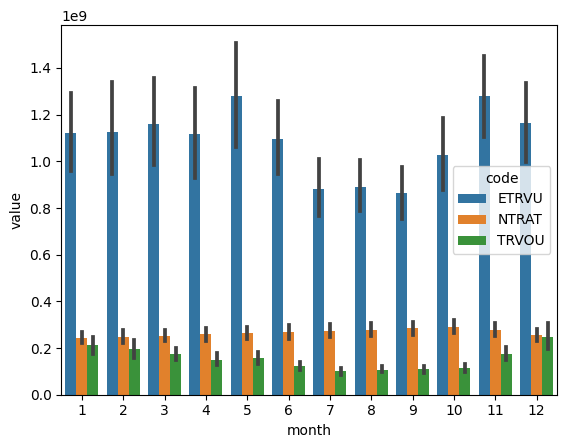

In [50]:
sns.barplot(data=new_data,x='month',y='value',hue='code')

As we notice, there isn't a strong trend in how months affect these coins except in ETRVU where it dips significantly during the summer months but has maxes right before it dips. Due to this volatility, where the max is reached right before the rate dips to the minima, I will ignore the effect month has on the coins. 

<Axes: xlabel='day', ylabel='value'>

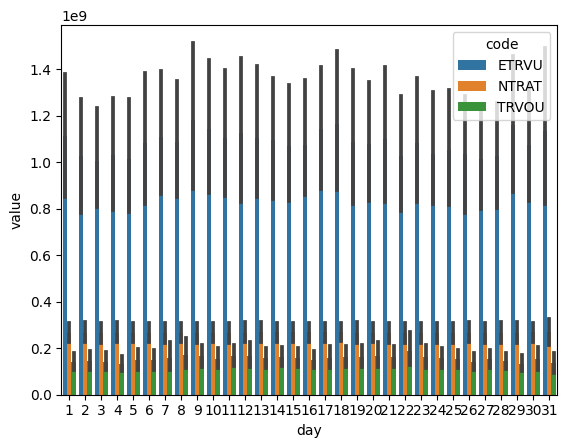

In [51]:
sns.barplot(data=new_data,x='day',y='value',hue='code')

Similarly, there isn't a strong trend in the day-to-day of the Exchange rates and thus it wouldn't be a good indicator to use in ML algorithms. 